<a href="https://colab.research.google.com/github/ddiestra/avila-dataset/blob/master/Analisis_de_la_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis de la Data

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip
!unzip avila.zip

--2020-07-05 19:13:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 584600 (571K) [application/x-httpd-php]
Saving to: ‘avila.zip’

avila.zip           100%[===================>] 570.90K   878KB/s    in 0.7s    

2020-07-05 19:13:09 (878 KB/s) - ‘avila.zip’ saved [584600/584600]

Archive:  avila.zip
   creating: avila/
  inflating: avila/avila-tr.txt      
  inflating: avila/avila-ts.txt      
  inflating: avila/avila-description.txt  


In [ ]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Lectura del dataset
file_name = "avila/avila-tr.txt"
column_names = ['intercolumnar_distance', 'upper_margin', 'lower_margin', 'exploitation', 'row_number', 'modular_ratio', 'interlinear_spacing', 'weight', 'peak_number', 'mr_is', 'class'];
dataset = pd.read_csv(file_name,  header=None, names=column_names)

In [ ]:
dataset.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,mr_is,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


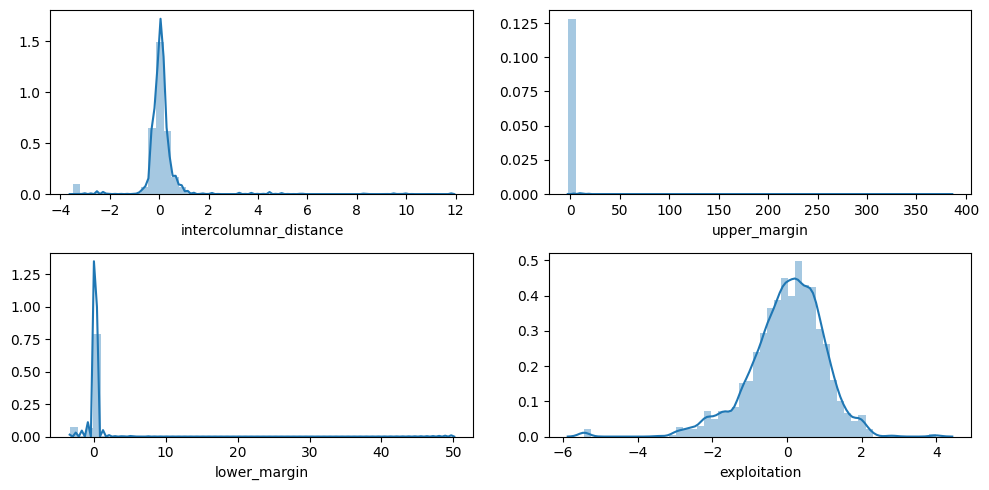

In [ ]:
width = 10
height = 5

plt.style.use("default")

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(width, height))

for column, axe in zip(dataset, axes.flatten()):
    if (column == 'class'):
       continue
    sns.distplot(dataset[column], ax=axe)
    
plt.tight_layout()

In [ ]:
dataset.max()

intercolumnar_distance    11.8199
upper_margin                  386
lower_margin                   50
exploitation              3.98715
row_number                1.06612
modular_ratio                  53
interlinear_spacing            83
weight                    13.1731
peak_number                    44
mr_is                     4.67123
class                           Y
dtype: object

In [ ]:
dataset['class'].value_counts()

A    4286
F    1961
E    1095
I     831
X     522
H     519
G     446
D     352
Y     266
C     103
W      44
B       5
Name: class, dtype: int64

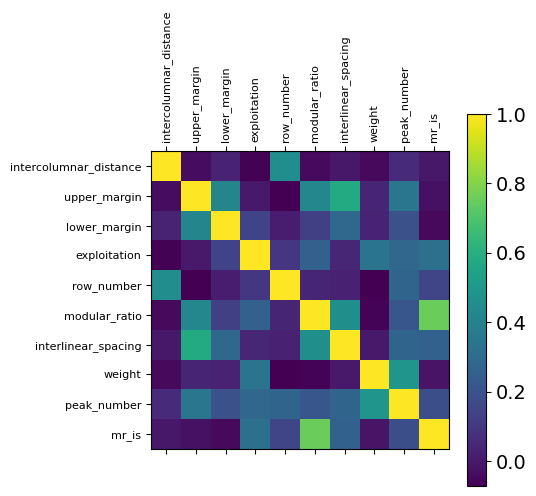

In [ ]:
dataset = dataset.drop('class',axis=1)
plt.matshow(dataset.corr())
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=8, rotation=90)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
dataset.corr()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,mr_is
intercolumnar_distance,1.000000,-0.037577,0.034473,-0.065338,0.451966,-0.044663,-0.001173,-0.043336,0.059427,-0.002839
upper_margin,-0.037577,1.000000,0.414578,0.002026,-0.067759,0.424384,0.582443,0.041227,0.349011,-0.024810
lower_margin,0.034473,0.414578,1.000000,0.143608,0.011333,0.132723,0.289165,0.034970,0.193194,-0.045392
exploitation,-0.065338,0.002026,0.143608,1.000000,0.096426,0.257627,0.043915,0.338970,0.281239,0.323915
row_number,0.451966,-0.067759,0.011333,0.096426,1.000000,0.039824,0.026447,-0.071220,0.274883,0.151590
modular_ratio,-0.044663,0.424384,0.132723,0.257627,0.039824,1.000000,0.462871,-0.059628,0.214207,0.755992
interlinear_spacing,-0.001173,0.582443,0.289165,0.043915,0.026447,0.462871,1.000000,0.002444,0.272458,0.263015
weight,-0.043336,0.041227,0.034970,0.338970,-0.071220,-0.059628,0.002444,1.000000,0.487543,-0.016045
peak_number,0.059427,0.349011,0.193194,0.281239,0.274883,0.214207,0.272458,0.487543,1.000000,0.186226
mr_is,-0.002839,-0.024810,-0.045392,0.323915,0.151590,0.755992,0.263015,-0.016045,0.186226,1.000000


In [ ]:
#Lectura del dataset
file_name_test = "avila/avila-tr.txt"
column_names = ['intercolumnar_distance', 'upper_margin', 'lower_margin', 'exploitation', 'row_number', 'modular_ratio', 'interlinear_spacing', 'weight', 'peak_number', 'mr_is', 'class'];
dp = pd.read_csv(file_name_test,  header=None, names=column_names)

In [ ]:
dp['class'].value_counts()

A    4286
F    1961
E    1095
I     831
X     522
H     519
G     446
D     352
Y     266
C     103
W      44
B       5
Name: class, dtype: int64

In [ ]:
dp.var()

intercolumnar_distance     0.982936
upper_margin              15.373210
lower_margin               1.254852
exploitation               1.017126
row_number                 0.984170
modular_ratio              1.268428
interlinear_spacing        1.725950
weight                     1.007026
peak_number                1.183016
mr_is                      1.014238
dtype: float64